In [2]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [84]:
df = pd.read_csv("week_approach_maskedID_timeseries.csv")

In [85]:
df.head(10)

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,max training success.2,avg recovery.2,min recovery.2,max recovery.2,Athlete ID,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
0,5.0,2.0,22.2,16.4,11.8,1.0,2.0,10.0,10.0,0.6,...,0.0,0.18,0.16,0.20,0,0,0.718447,1.378882,1.919255,0
1,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.18,0.16,0.20,0,0,0.683544,1.018868,1.490566,1
2,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.17,0.16,0.18,0,0,0.683544,1.018868,1.490566,2
3,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.18,0.16,0.18,0,0,0.683544,1.018868,1.490566,3
4,6.0,1.0,39.2,17.6,18.9,1.0,3.0,17.2,10.0,0.5,...,0.0,0.17,0.16,0.18,0,0,2.202247,1.361111,0.618056,4
5,6.0,1.0,39.2,17.6,18.9,1.0,3.0,17.2,10.0,0.5,...,0.0,0.17,0.16,0.18,0,0,2.202247,1.361111,0.618056,5
6,6.0,1.0,33.3,17.6,15.4,1.0,3.0,13.7,7.2,0.5,...,0.0,0.17,0.16,0.18,0,0,1.500000,1.077670,0.718447,6
7,5.0,2.0,33.3,17.6,15.4,1.0,3.0,13.7,7.2,0.5,...,0.0,0.17,0.16,0.18,0,0,1.500000,1.077670,0.718447,7
8,5.0,2.0,32.9,17.6,15.5,0.0,3.0,14.3,7.2,0.0,...,0.0,0.17,0.16,0.18,0,0,1.523148,1.041139,0.683544,8
9,5.0,2.0,32.9,17.6,15.5,0.0,3.0,14.3,7.2,0.0,...,0.0,0.17,0.16,0.18,0,0,1.523148,1.041139,0.683544,9


In [86]:
df.columns

Index(['nr. sessions', 'nr. rest days', 'total kms', 'max km one day',
       'total km Z3-Z4-Z5-T1-T2',
       'nr. tough sessions (effort in Z5, T1 or T2)',
       'nr. days with interval session', 'total km Z3-4',
       'max km Z3-4 one day', 'total km Z5-T1-T2', 'max km Z5-T1-T2 one day',
       'total hours alternative training', 'nr. strength trainings',
       'avg exertion', 'min exertion', 'max exertion', 'avg training success',
       'min training success', 'max training success', 'avg recovery',
       'min recovery', 'max recovery', 'nr. sessions.1', 'nr. rest days.1',
       'total kms.1', 'max km one day.1', 'total km Z3-Z4-Z5-T1-T2.1',
       'nr. tough sessions (effort in Z5, T1 or T2).1',
       'nr. days with interval session.1', 'total km Z3-4.1',
       'max km Z3-4 one day.1', 'total km Z5-T1-T2.1',
       'max km Z5-T1-T2 one day.1', 'total hours alternative training.1',
       'nr. strength trainings.1', 'avg exertion.1', 'min exertion.1',
       'max exertion.

In [87]:
df = df.drop(df.columns[22:66], axis=1)

In [88]:
df.isnull().sum()

nr. sessions                                   0
nr. rest days                                  0
total kms                                      0
max km one day                                 0
total km Z3-Z4-Z5-T1-T2                        0
nr. tough sessions (effort in Z5, T1 or T2)    0
nr. days with interval session                 0
total km Z3-4                                  0
max km Z3-4 one day                            0
total km Z5-T1-T2                              0
max km Z5-T1-T2 one day                        0
total hours alternative training               0
nr. strength trainings                         0
avg exertion                                   0
min exertion                                   0
max exertion                                   0
avg training success                           0
min training success                           0
max training success                           0
avg recovery                                   0
min recovery        

In [89]:
df.nunique()

nr. sessions                                      15
nr. rest days                                      8
total kms                                       1772
max km one day                                   395
total km Z3-Z4-Z5-T1-T2                          493
nr. tough sessions (effort in Z5, T1 or T2)        7
nr. days with interval session                     8
total km Z3-4                                    378
max km Z3-4 one day                              177
total km Z5-T1-T2                                317
max km Z5-T1-T2 one day                          136
total hours alternative training                 679
nr. strength trainings                            10
avg exertion                                      94
min exertion                                      90
max exertion                                     101
avg training success                              99
min training success                             101
max training success                          

In [90]:
df['injury'].nunique()

2

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42798 entries, 0 to 42797
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   nr. sessions                                 42798 non-null  float64
 1   nr. rest days                                42798 non-null  float64
 2   total kms                                    42798 non-null  float64
 3   max km one day                               42798 non-null  float64
 4   total km Z3-Z4-Z5-T1-T2                      42798 non-null  float64
 5   nr. tough sessions (effort in Z5, T1 or T2)  42798 non-null  float64
 6   nr. days with interval session               42798 non-null  float64
 7   total km Z3-4                                42798 non-null  float64
 8   max km Z3-4 one day                          42798 non-null  float64
 9   total km Z5-T1-T2                            42798 non-null  float64
 10

In [92]:
df.describe()

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,max training success,avg recovery,min recovery,max recovery,Athlete ID,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
count,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,...,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,4.279800e+04,4.279800e+04,4.279800e+04,42798.000000
mean,5.809337,1.874667,49.543911,14.009255,9.433621,0.930184,1.672531,4.859398,3.456888,4.063970,...,0.525050,0.255519,0.185625,0.344188,34.538249,0.013435,4.408628e+05,9.014685e+05,4.803623e+05,1227.733422
std,2.484234,1.853287,36.715017,9.071678,8.887120,1.040631,1.263528,6.984670,4.577423,5.645305,...,0.390642,0.153278,0.127988,0.219596,19.020826,0.115130,4.328234e+06,6.945503e+06,4.656806e+06,806.495152
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,5.000000,1.000000,22.800000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.150000,0.110000,0.170000,20.000000,0.000000,6.955245e-01,6.723968e-01,6.923077e-01,437.000000
50%,6.000000,1.000000,44.800000,13.400000,8.000000,1.000000,2.000000,0.000000,0.000000,1.500000,...,0.730000,0.220000,0.160000,0.310000,34.000000,0.000000,9.891862e-01,1.001431e+00,9.897523e-01,1254.000000
75%,7.000000,3.000000,70.100000,18.300000,14.600000,2.000000,3.000000,8.000000,6.300000,6.300000,...,0.840000,0.360000,0.250000,0.520000,50.000000,0.000000,1.320515e+00,1.422171e+00,1.327586e+00,1913.000000
max,14.000000,7.000000,242.000000,131.000000,100.000000,6.000000,7.000000,79.800000,75.000000,80.000000,...,1.000000,0.900000,0.900000,1.000000,73.000000,1.000000,2.096000e+08,2.176000e+08,2.096000e+08,2673.000000


In [94]:
df.tail()

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,max training success,avg recovery,min recovery,max recovery,Athlete ID,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
42793,4.0,3.0,59.5,19.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.93,0.32,0.24,0.41,71,1,2.479167,1.101852,0.444444,2143
42794,1.0,6.0,5.8,5.8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.46,0.06,0.06,0.06,71,1,1.054545,1.288889,1.222222,2286
42795,3.0,4.0,38.3,16.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.88,0.22,0.11,0.30,71,1,0.750980,0.743689,0.990291,2483
42796,5.0,2.0,67.0,15.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.87,0.17,0.11,0.20,71,1,2.005988,1.238447,0.617375,2647
42797,4.0,3.0,45.0,12.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.95,0.32,0.15,0.57,71,1,1.011236,1.022727,1.011364,2673


In [95]:
df.shape

(42798, 28)

In [96]:
df['injury'].unique()

array([0, 1], dtype=int64)

In [97]:
df['injury'].value_counts()

0    42223
1      575
Name: injury, dtype: int64

In [98]:
df['nr. sessions'].unique()

array([ 5.,  6.,  7.,  4.,  3.,  2.,  8.,  9., 10.,  1.,  0., 11., 12.,
       13., 14.])

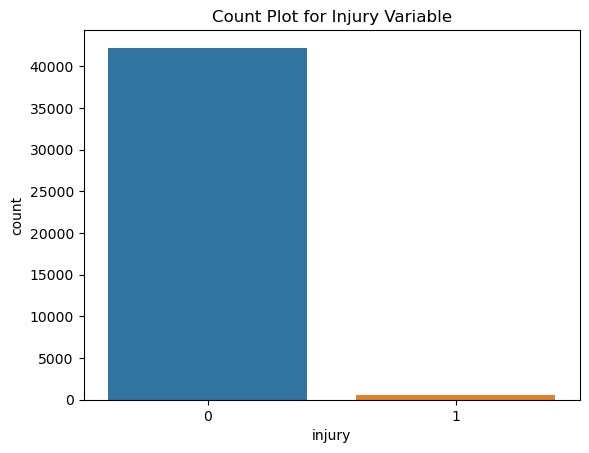

In [99]:
# injury is a categorical variable
plt.title("Count Plot for Injury Variable")
sns.countplot(x='injury', data=df)
plt.show()

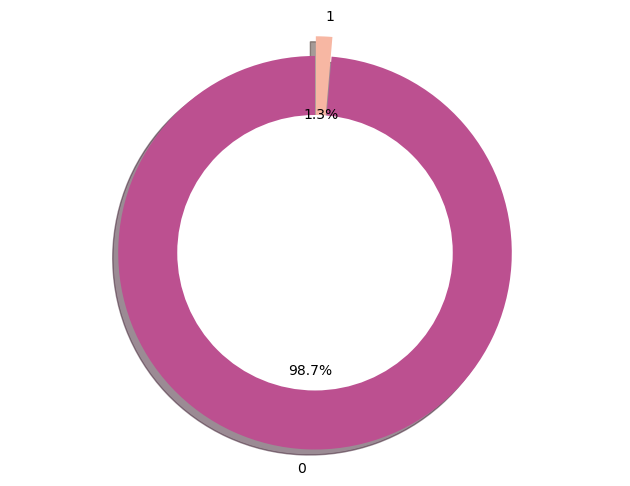

In [100]:
injury_data_count = df['injury'].value_counts()
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
colors = ['#bc5090', '#F7B7A3']
ax1.pie(injury_data_count, colors = colors, explode=explode, labels=injury_data_count.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [101]:
df['Athlete ID'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73], dtype=int64)

In [102]:
df['Athlete ID'].value_counts()

32    1791
20    1737
22    1478
43    1471
41    1393
      ... 
66     148
39     129
15     126
55      48
60      43
Name: Athlete ID, Length: 74, dtype: int64

In [103]:
dfc = df.copy()

In [104]:
dfc = dfc.set_index('Athlete ID')

In [105]:
dfc.head()

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,min training success,max training success,avg recovery,min recovery,max recovery,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
Athlete ID,,,,,,,,,,,,,,,,,,,,,
0,5.0,2.0,22.2,16.4,11.8,1.0,2.0,10.0,10.0,0.6,...,0.0,0.0,0.17,0.15,0.18,0,0.718447,1.378882,1.919255,0
0,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.0,0.17,0.15,0.18,0,0.683544,1.018868,1.490566,1
0,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.0,0.17,0.15,0.18,0,0.683544,1.018868,1.490566,2
0,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.0,0.17,0.15,0.18,0,0.683544,1.018868,1.490566,3
0,6.0,1.0,39.2,17.6,18.9,1.0,3.0,17.2,10.0,0.5,...,0.0,0.0,0.17,0.15,0.18,0,2.202247,1.361111,0.618056,4


In [106]:
dfc.isnull().sum()

nr. sessions                                   0
nr. rest days                                  0
total kms                                      0
max km one day                                 0
total km Z3-Z4-Z5-T1-T2                        0
nr. tough sessions (effort in Z5, T1 or T2)    0
nr. days with interval session                 0
total km Z3-4                                  0
max km Z3-4 one day                            0
total km Z5-T1-T2                              0
max km Z5-T1-T2 one day                        0
total hours alternative training               0
nr. strength trainings                         0
avg exertion                                   0
min exertion                                   0
max exertion                                   0
avg training success                           0
min training success                           0
max training success                           0
avg recovery                                   0
min recovery        

In [107]:
dfc.duplicated().sum()

598

In [108]:
dfc.duplicated()

Athlete ID
0     False
0     False
0     False
0     False
0     False
      ...  
71    False
71    False
71    False
71    False
71    False
Length: 42798, dtype: bool

In [109]:
dfc = dfc.drop_duplicates()

In [110]:
dfc.duplicated().sum()

0

In [111]:
dfc.shape

(42200, 27)

In [112]:
df.shape

(42798, 28)

In [113]:
df1 = dfc[dfc['injury'] == 0]
df2 = dfc[dfc['injury'] == 1]

Text(0.5, 1.0, 'Sessions by injury')

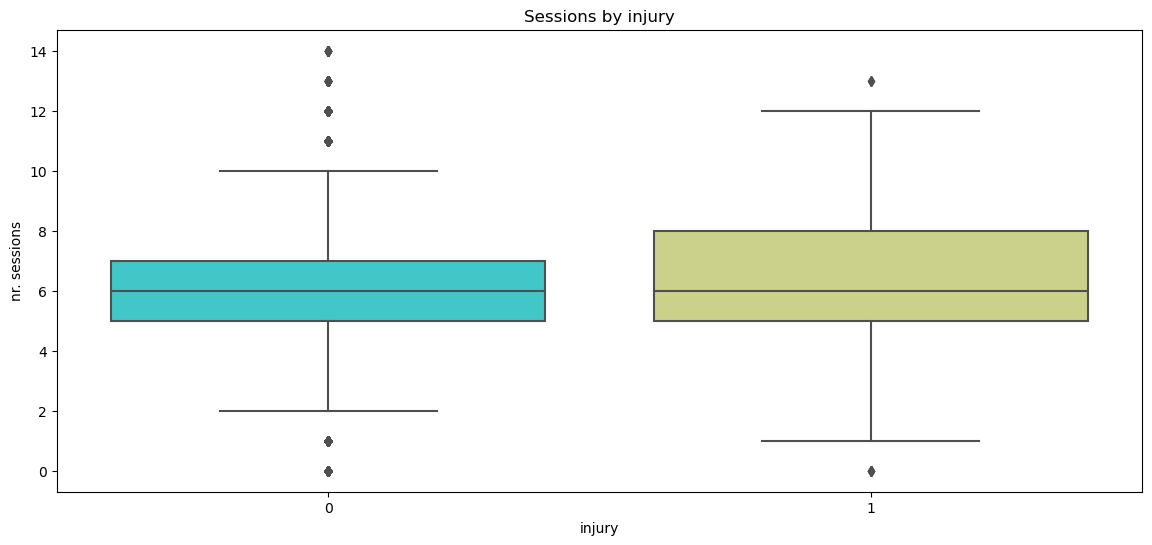

In [114]:
plt.figure(figsize=(14,6))
sns.boxplot(x='injury', y='nr. sessions', data=dfc, palette='rainbow')
plt.title("Sessions by injury")

Text(0.5, 1.0, 'Sessions by injury')

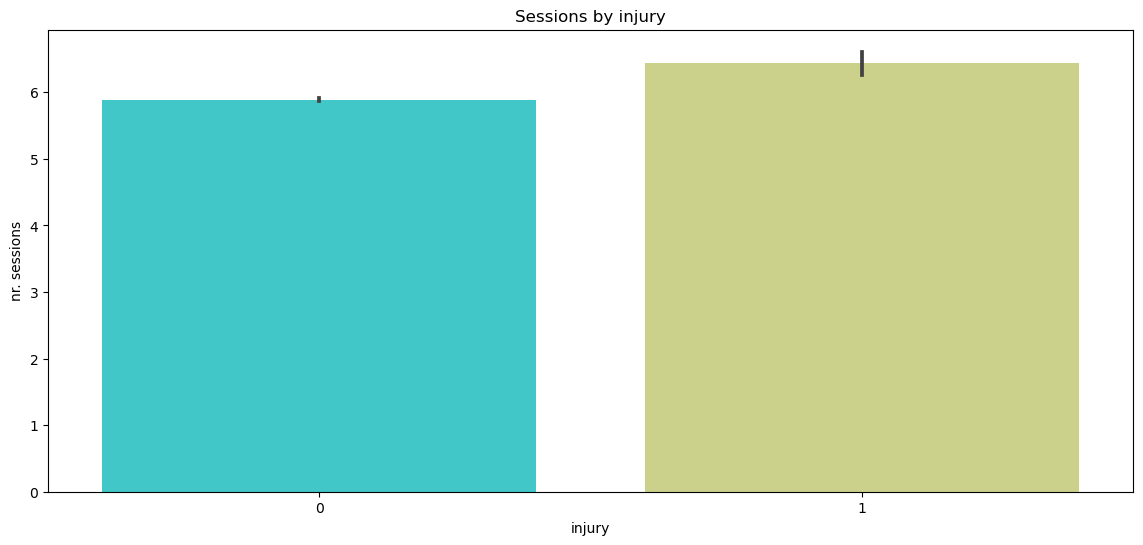

In [115]:
plt.figure(figsize=(14,6))
sns.barplot(x='injury', y='nr. sessions', data=dfc, palette='rainbow')
plt.title("Sessions by injury")

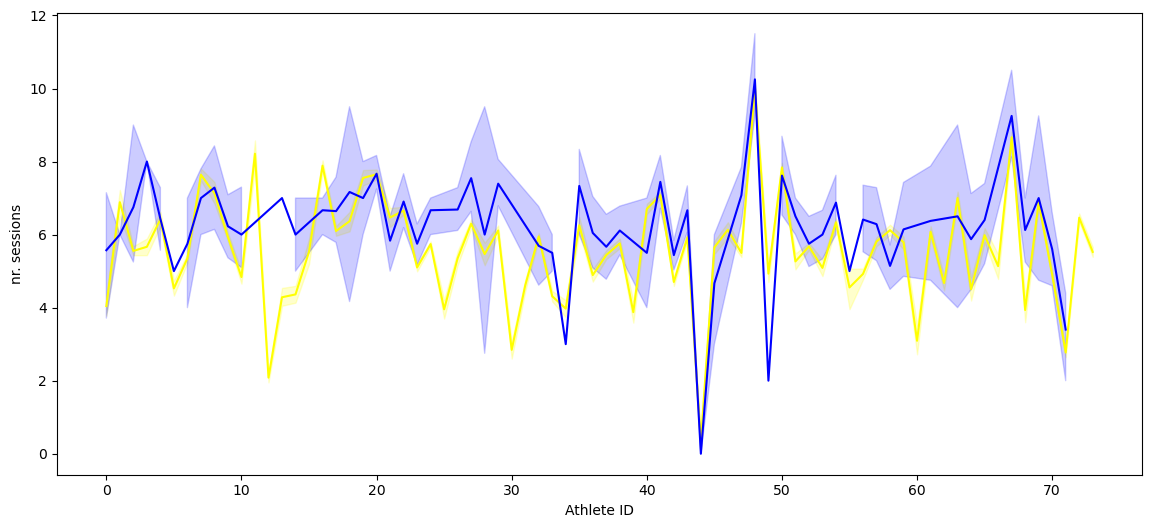

In [116]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df1['nr. sessions'], color='yellow')
sns.lineplot(data=df2['nr. sessions'], color='blue')
plt.show()

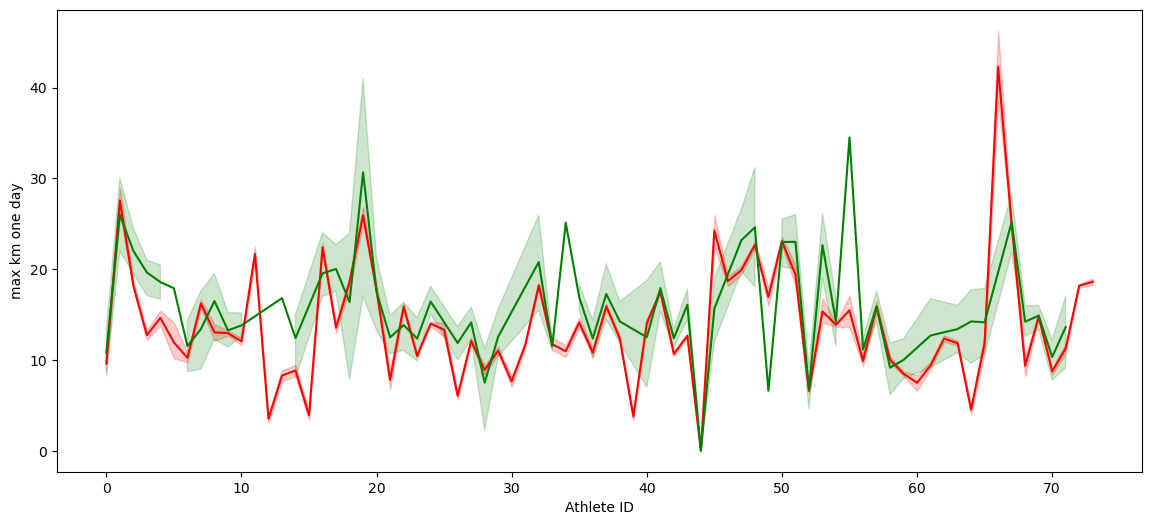

In [117]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df1['max km one day'], color='red')
sns.lineplot(data=df2['max km one day'], color='green')
plt.show()

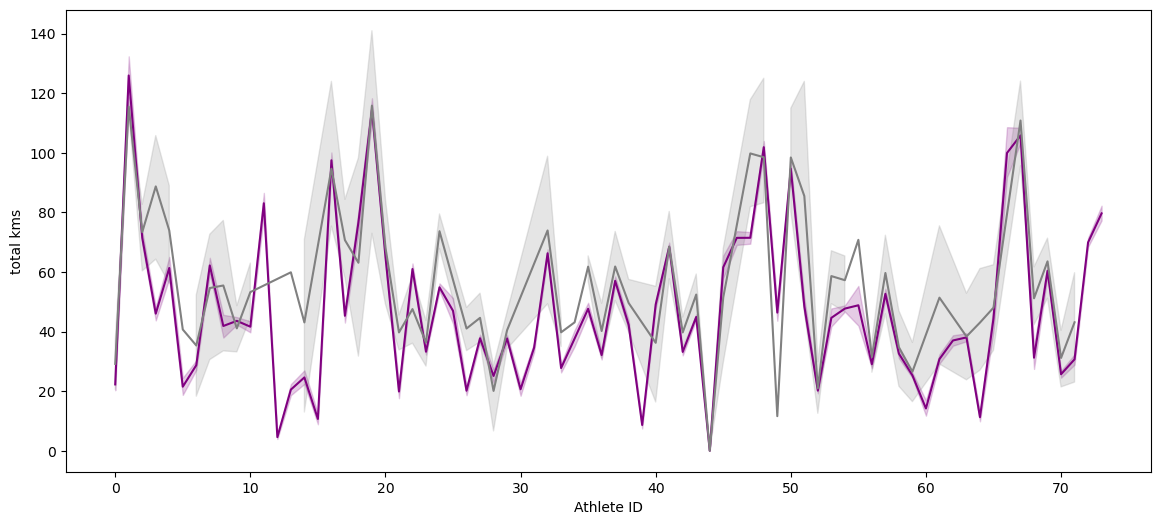

In [118]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df1['total kms'], color='purple')
sns.lineplot(data=df2['total kms'], color='grey')
plt.show()

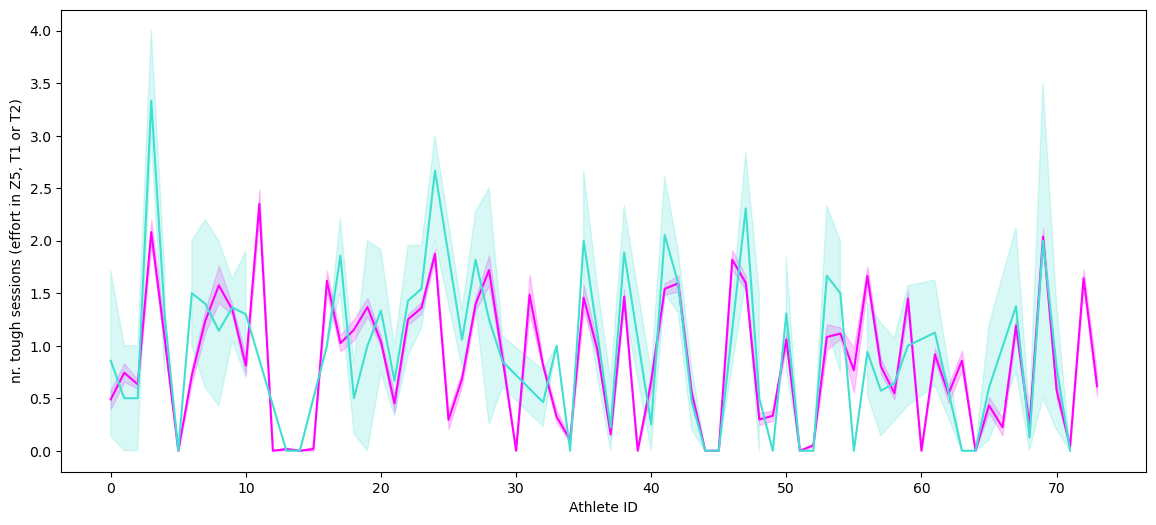

In [119]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df1['nr. tough sessions (effort in Z5, T1 or T2)'], color='magenta')
sns.lineplot(data=df2['nr. tough sessions (effort in Z5, T1 or T2)'], color='turquoise')
plt.show()

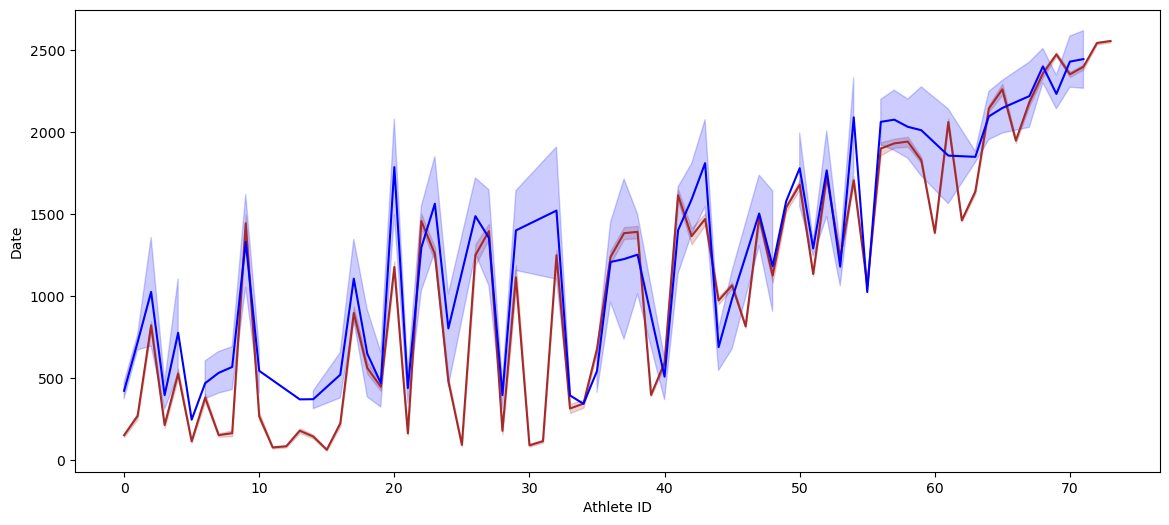

In [120]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df1['Date'], color='brown')
sns.lineplot(data=df2['Date'], color='blue')
plt.show()

In [121]:
y = dfc['injury']
x = dfc.drop('injury', axis=1)

In [122]:
x

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,avg training success,min training success,max training success,avg recovery,min recovery,max recovery,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
Athlete ID,,,,,,,,,,,,,,,,,,,,,
0,5.0,2.0,22.2,16.4,11.8,1.0,2.0,10.0,10.0,0.6,...,0.00,0.00,0.00,0.17,0.15,0.18,0.718447,1.378882,1.919255,0
0,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.00,0.00,0.00,0.17,0.15,0.18,0.683544,1.018868,1.490566,1
0,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.00,0.00,0.00,0.17,0.15,0.18,0.683544,1.018868,1.490566,2
0,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.00,0.00,0.00,0.17,0.15,0.18,0.683544,1.018868,1.490566,3
0,6.0,1.0,39.2,17.6,18.9,1.0,3.0,17.2,10.0,0.5,...,0.00,0.00,0.00,0.17,0.15,0.18,2.202247,1.361111,0.618056,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,4.0,3.0,59.5,19.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.66,0.22,0.93,0.32,0.24,0.41,2.479167,1.101852,0.444444,2143
71,1.0,6.0,5.8,5.8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.46,0.46,0.46,0.06,0.06,0.06,1.054545,1.288889,1.222222,2286
71,3.0,4.0,38.3,16.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.69,0.37,0.88,0.22,0.11,0.30,0.750980,0.743689,0.990291,2483


In [123]:
y

Athlete ID
0     0
0     0
0     0
0     0
0     0
     ..
71    1
71    1
71    1
71    1
71    1
Name: injury, Length: 42200, dtype: int64

In [124]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

In [126]:
k = 10
selector = SelectKBest(score_func=chi2, k=k)
X_new= selector.fit_transform(x, y)

In [127]:
# Get the indices of the selected features
selected_features = selector.get_support(indices=True)

# Subset the original data with the selected features
X= x.iloc[:, selected_features]

In [129]:
X

,nr. rest days,total km Z3-Z4-Z5-T1-T2,total km Z3-4,total km Z5-T1-T2,max km Z5-T1-T2 one day,nr. strength trainings,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
Athlete ID,,,,,,,,,,
0,2.0,11.8,10.0,0.6,0.6,2.0,0.718447,1.378882,1.919255,0
0,2.0,11.7,10.0,0.5,0.5,2.0,0.683544,1.018868,1.490566,1
0,2.0,11.7,10.0,0.5,0.5,2.0,0.683544,1.018868,1.490566,2
0,2.0,11.7,10.0,0.5,0.5,2.0,0.683544,1.018868,1.490566,3
0,1.0,18.9,17.2,0.5,0.5,2.0,2.202247,1.361111,0.618056,4
...,...,...,...,...,...,...,...,...,...,...
71,3.0,0.0,0.0,0.0,0.0,0.0,2.479167,1.101852,0.444444,2143
71,6.0,0.0,0.0,0.0,0.0,0.0,1.054545,1.288889,1.222222,2286
71,4.0,0.0,0.0,0.0,0.0,0.0,0.750980,0.743689,0.990291,2483


In [146]:
# Get the scores of each feature
feature_scores = selector.scores_

# Print the scores of each feature
for i, score in enumerate(feature_scores):
    print(f"Feature {i+1}: {score:.2f}")

Feature 1: 29.19
Feature 2: 65.21
Feature 3: 30.09
Feature 4: 12.97
Feature 5: 238.87
Feature 6: 25.39
Feature 7: 29.92
Feature 8: 52.25
Feature 9: 31.24
Feature 10: 158.09
Feature 11: 74.46
Feature 12: 0.28
Feature 13: 38.50
Feature 14: 11.44
Feature 15: 2.73
Feature 16: 19.28
Feature 17: 12.04
Feature 18: 5.06
Feature 19: 16.13
Feature 20: 3.70
Feature 21: 0.68
Feature 22: 9.73
Feature 23: 26507742.38
Feature 24: 13129671.82
Feature 25: 215789.39
Feature 26: 18189.87


In [130]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [131]:
from xgboost import XGBClassifier

In [164]:
from imblearn.over_sampling import SMOTE

X, y = SMOTE().fit_resample(X, y)


In [165]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,random_state = 68)

In [167]:
knn= KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2 )
knn.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=10)

In [168]:
y_pred_knn= knn.predict(X_test)

In [169]:
confm_knn = confusion_matrix(y_test, y_pred_knn)

In [170]:
confm_knn

array([[10812,  1593],
       [   74, 12496]], dtype=int64)

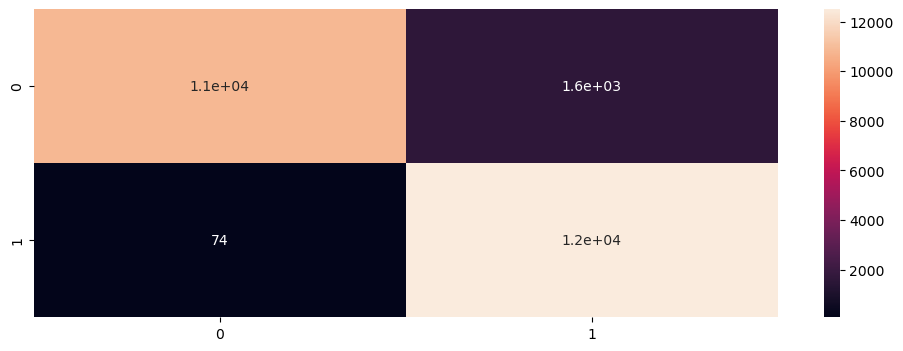

In [171]:
plt.figure(figsize=(12,4))
sns.heatmap(confm_knn, annot=True)
plt.show()

In [172]:
print(accuracy_score(y_test, y_pred_knn))

0.9332532532532533


In [173]:
boost = XGBClassifier(max_depth = 2, n_estimators = 30)
boost.fit(X_train, y_train)
Y_pred = boost.predict(X_test)
print(confusion_matrix(y_test, Y_pred))

[[12402     3]
 [  954 11616]]


In [174]:
print(accuracy_score(y_test, Y_pred))

0.9616816816816817


In [175]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, stratify = y)
sm = SMOTE(random_state = 0)
X_train, Y_train = sm.fit_resample(X_train,Y_train)
boost = XGBClassifier(max_depth = 2, n_estimators = 30)
boost.fit(X_train, Y_train)
Y_pred = boost.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))

[[10397     9]
 [  856  9551]]


In [176]:
print(accuracy_score(Y_test, Y_pred))

0.958439436890405


In [149]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state=68)

In [177]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train, Y_train)
y_pred_lr = lr.predict(X_test)
print(confusion_matrix(Y_test, y_pred_lr))

[[6467 3939]
 [3347 7060]]


In [178]:
print(accuracy_score(Y_test, y_pred_lr))

0.6499303320040359


In [179]:
rf = RandomForestClassifier(n_estimators= 10, max_depth=6)
rf.fit(X_train, Y_train) 

RandomForestClassifier(max_depth=6, n_estimators=10)

In [180]:
y_pred_rf = rf.predict(X_test)

In [181]:
print(confusion_matrix(Y_test, y_pred_rf))

[[9102 1304]
 [1203 9204]]


In [182]:
print(accuracy_score(Y_test, y_pred_rf))

0.8795464373228271


In [183]:
print(classification_report(Y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88     10406
           1       0.88      0.88      0.88     10407

    accuracy                           0.88     20813
   macro avg       0.88      0.88      0.88     20813
weighted avg       0.88      0.88      0.88     20813



In [184]:
confm_rf = confusion_matrix(Y_test, y_pred_rf)

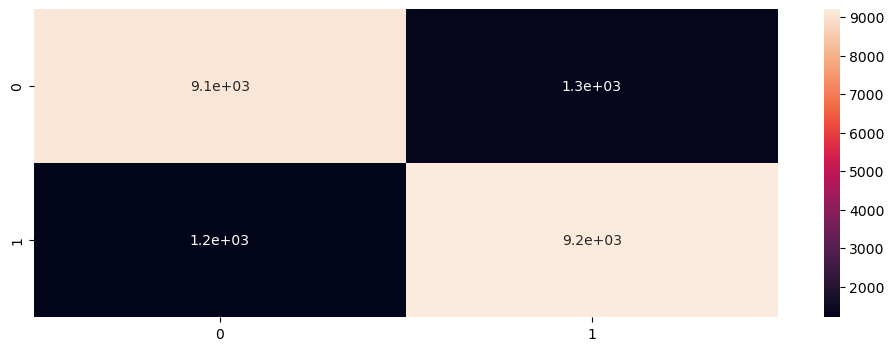

In [185]:
plt.figure(figsize=(12,4))
sns.heatmap(confm_rf, annot=True)
plt.show()